# Carga de Datos

In [2]:
import pandas as pd
import os

data_path = '../../Data/Used Cars/'

bmw = pd.read_csv(data_path+'bmw.csv')
toyota = pd.read_csv(data_path+'toyota.csv')
audi = pd.read_csv(data_path+'audi.csv')

In [3]:
# Carga del modelo de SKleanr. 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

help(LinearRegression)

In [5]:
bmw.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0


In [10]:
X = bmw[['mileage']].copy()
y = bmw[['price']].copy()

In [11]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [12]:
lr.coef_

array([[-0.27486262]])

In [13]:
lr.intercept_

array([29741.57747368])

Imaginemos...
* Recorro 3 millas, entonces perdería 3*.27=.81
* Perdería un dolar de valor del coche cada 1/.27=3.7 millas. 

In [16]:
#Errores:
y = y.copy()
y_hat = lr.predict(X)

In [17]:
bmw['epsilon'] = y-y_hat
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,epsilon
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,-107.091063
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,1333.810640
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,3518.146086
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,-9659.342138
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,-4369.661277
...,...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,477.765079
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,-3337.052396
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,-9641.376187
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,-7442.759431


In [18]:
bmw[['epsilon']].describe(percentiles=[i/10 for i in range(11)])

,epsilon
count,1.078100e+04
mean,2.246024e-12
std,9.085891e+03
min,-1.812450e+04
0%,-1.812450e+04
10%,-8.666005e+03
20%,-6.526358e+03
30%,-4.791625e+03
40%,-3.354014e+03
50%,-1.924737e+03


In [19]:
bmw[['price']].describe(percentiles=[i/10 for i in range(11)])

,price
count,10781.000000
mean,22733.408867
std,11415.528189
min,1200.000000
0%,1200.000000
10%,11199.000000
20%,13881.000000
30%,15981.000000
40%,17999.000000
50%,20462.000000


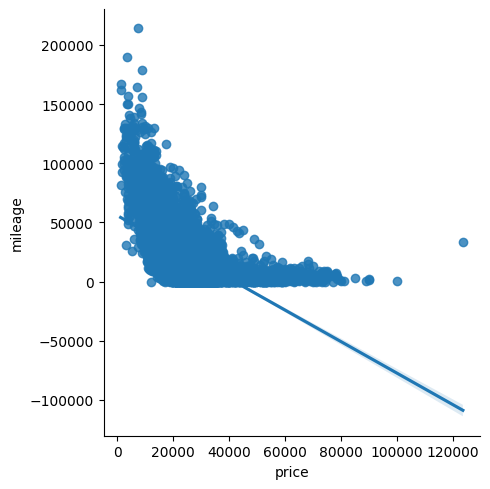

In [22]:
import seaborn as sns

sns.lmplot(data=bmw, x='price', y='mileage', fit_reg=True)